<a href="https://colab.research.google.com/github/enikolaev/ML_and_NN/blob/main/Practical_Work_MLP_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Архитектура многослойного персептрона

## Многослойная нейронная сеть

Многослойная нейронная сеть (Multi-Layer Perseptron) достаточно простая нейронная сеть, которая представляет собой последовательность слоев нейронов. В настоящий момент это устаревшие сети - на смену им пришли сверточные нейронные сети (Convolutional Neural Networks, CNN). В данной работе необходимо оценить возможности MLP по классификации изображений морских животных.

## Подключение библиотек

In [ ]:
import keras 
from keras.datasets import mnist
from keras.utils import np_utils 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.constraints import max_norm
from keras import Input
from keras.optimizers import adam_v2
import matplotlib.pyplot as plt
import numpy as np

## Классификация с использованием данных MNIST

Набор MNIST - это простой набор данных. Можно сказать, что это не изображения, а вектора, которые приходится классифицировать. Реализуем классификатор MLP и оценим его качество

### Загрузка набора данных

In [ ]:
#загружается датасет mnist, содержащий изображения рукописных цифр от 0 до 9
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')
X_train/=255
X_test/=255
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes) 

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)

(60000, 784)


### Задание архитектуры сети

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Обучение

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 8s 24ms/step - loss: 0.3709 - accuracy: 0.8903 - val_loss: 0.1728 - val_accuracy: 0.9495
Epoch 2/10
300/300 [==============================] - 6s 20ms/step - loss: 0.1742 - accuracy: 0.9491 - val_loss: 0.1178 - val_accuracy: 0.9648
Epoch 3/10
300/300 [==============================] - 10s 33ms/step - loss: 0.1300 - accuracy: 0.9615 - val_loss: 0.0955 - val_accuracy: 0.9710
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 0.1044 - accuracy: 0.9690 - val_loss: 0.0826 - val_accuracy: 0.9743
Epoch 5/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0888 - accuracy: 0.9732 - val_loss: 0.0754 - val_accuracy: 0.9761
Epoch 6/10
300/300 [==============================] - 11s 37ms/step - loss: 0.0768 - accuracy: 0.9760 - val_loss: 0.0667 - val_accuracy: 0.9799
Epoch 7/10
300/300 [==============================] - 7s 25ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.0654 - val_accuracy: 0.98

### Оценка кривых обучения

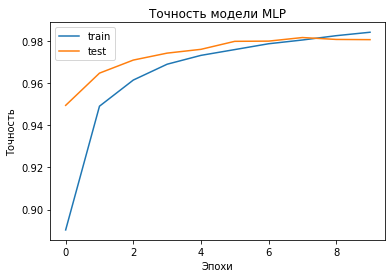

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели MLP')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

В принципе, в результате обучения получена модель с неплохой точностью. Реализуем предсказание (классификацию) изображений, не входящих в обучающие и тестовые наборы

### Использование модели

In [ ]:
# скачаем 
!wget -qq https://raw.githubusercontent.com/enikolaev/ML_and_NN/main/data/mnist_testing.zip
!mkdir mnist_testing
!unzip -q 'mnist_testing.zip' -d mnist_testing
# Посмотрим содержимое скачанного арива и удалим неиспользуемые архивы
!ls mnist_testing/
!rm mnist_testing.zip

eight.png  five.png  nine.png  one.png	seven.png  two.png


In [ ]:
!ls mnist_testing/

eight.png  five.png  nine.png  one.png	seven.png  two.png


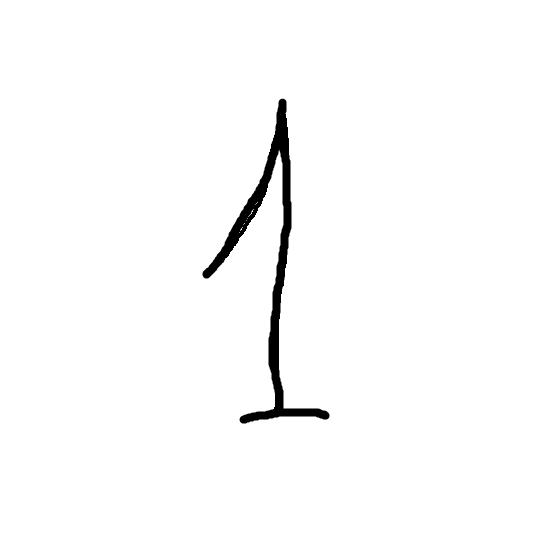

1/1 [==============================] - 0s 44ms/step
[[0.00252002 0.8770554  0.00492493 0.0061615  0.05159836 0.0088784
  0.01586022 0.01611563 0.00745371 0.00943176]]
1


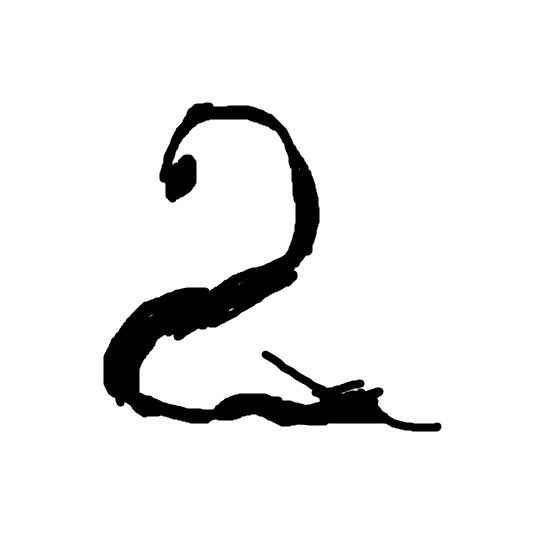

1/1 [==============================] - 0s 72ms/step
[[9.1572374e-06 9.4924355e-03 9.3042517e-01 7.0113353e-03 8.0341626e-05
  3.1899612e-02 1.2934574e-02 1.1226205e-03 7.0244265e-03 2.3379049e-07]]
2


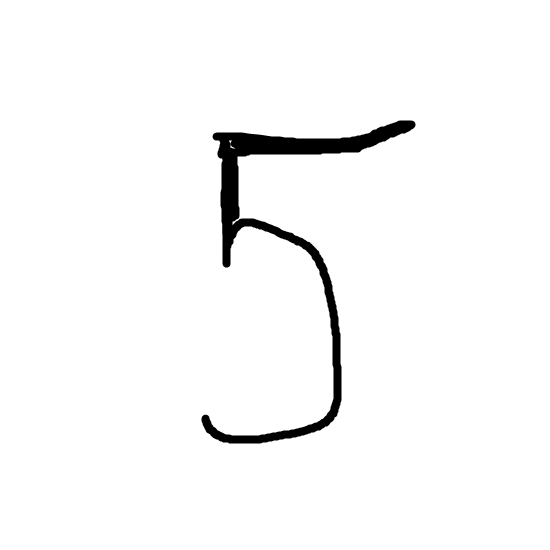

1/1 [==============================] - 0s 139ms/step
[[4.5965647e-04 1.0515552e-03 1.6645066e-04 2.3210524e-03 4.3620137e-05
  9.4817042e-01 2.4407724e-04 2.0270776e-03 1.7844220e-03 4.3731604e-02]]
5


In [ ]:
from PIL import Image
from IPython.display import Image as D
# преобразование входного изображения в формат набора MNIST
def get_image(ima_path):
  raw_ima = Image.open(ima_path)
  img = np.invert(raw_ima.resize((28,28)).convert('L')).ravel()
  im2arr = img.reshape(1, 28 * 28).astype('float32')/255
  return im2arr
one_path = 'mnist_testing/one.png'
two_path = 'mnist_testing/two.png'
five_path = 'mnist_testing/five.png'
# использование обученной модели
x=one_path
display(D(x, width=100))
x_pred = get_image(x)
y_pred = model.predict(x_pred)
print(y_pred) 
print(np.argmax(y_pred))

x=two_path
display(D(x, width=100))
x_pred = get_image(x)
y_pred = model.predict(x_pred)
print(y_pred) 
print(np.argmax(y_pred))

x=five_path
display(D(x, width=100))
x_pred = get_image(x)
y_pred = model.predict(x_pred)
print(y_pred) 
print(np.argmax(y_pred))

### Выводы

Даже простенький, практически однослойный, персептрон способен выполнять классификацию визуальных изображений. НО! Успех такой модели кроится в простоте используемого набора данных

Реализуем классификатор такой же архитектуры, но с использованием сложного набора данных

## Классификация с использованием сложного набора данных 

Данный набор данных представляет собой изображения морских животных (5 категорий по 60 в каждой). Вам предлагается оценить качество модели MLP применительно к сложным графическим наборам данных

### Загрузка данных

Получим список архивов с изображениями, затем выполним загрузку архивов с исзображениями в соответствии со списком

In [ ]:
!wget -qq https://raw.githubusercontent.com/enikolaev/ML_and_NN/main/data/data_sea_animals.txt
!wget -qq -i data_sea_animals.txt

Выполним распаковку архивов в каталог `training`

In [ ]:
!mkdir training
!unzip -q '*.zip' -d training
# Посмотрим какие подкаталоги 
!ls training/

mkdir: cannot create directory ‘training’: File exists

5 archives were successfully processed.
crab  goldfish	jellyfish  seahorse  squid


Изучим содержимое каталога

In [ ]:
!ls training/crab/

01c3fc5278.jpg	1de5e32b3e.jpg	3d7220b4ea.jpg	57f3c20f3e.jpg	89b1cd7401.jpg
03a4208397.jpg	1e2b79379b.jpg	3dcd66a4a7.jpg	58a0e73fa1.jpg	8a33efacf4.jpg
044edccd83.jpg	1eb3673642.jpg	3eda69a7a1.jpg	5f04912e9e.jpg	8a8c5babf9.jpg
0615c19b25.jpg	1f60096138.jpg	3efb4f3151.jpg	61b7dcd0ae.jpg	8b5424d2ad.jpg
0a37acd141.jpg	1f6d2f18af.jpg	48e8eb8c1e.jpg	6bba319305.jpg	8b62ebe6e2.jpg
0a3d16566f.jpg	21cfefa411.jpg	497cc8adee.jpg	6cddf4fea1.jpg	8ca7742d95.jpg
0b8367a031.jpg	244ef898cd.jpg	4d02dfebb4.jpg	70a7d96611.jpg	8f2b6ddbf7.jpg
0c8b345dc6.jpg	28a44015b4.jpg	504a7a0346.jpg	7aaa3f657b.jpg	8fd3cea7b7.jpg
103bfb5679.jpg	2a017fbee0.jpg	51cc8c3bc9.jpg	7d712e2025.jpg	97fe281ca4.jpg
11c7c6b51e.jpg	2ba8cb98d6.jpg	55b247f3fa.jpg	7f65b9bf02.jpg	99bafd36a8.jpg
15a262b4eb.jpg	3bdf0986c4.jpg	56a9e1e52c.jpg	82d357358c.jpg	9b74fbf107.jpg
15b1fc2157.jpg	3c63c57a72.jpg	56ddab436a.jpg	84c7171790.jpg	9ced152535.jpg


Удалим неиспользуемые файлы архивов

In [ ]:
!rm *.zip

In [ ]:
# !rm /training/crab/*
# !rm /training/goldfish/*

### Подготовка обучающей выборки на основе загруженных файлов

Для подготовки обучающего набора будем использовать класс `ImageDataGenerator`, которому зададим следующие параметры:

`batch_size` - размер батча

`data_dir` - каталог с обучающей выборкой

`validation_percent` - роцент выборки, который уйдет на валидацию


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# размер батча
batch_size=32
# каталог с обучающей выборкой
data_dir = "training"
# Процент выборки, который уйдет на валидацию
validation_percent = 0.1
# размер для масштабирования
pref_size = (64,64)

train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=validation_percent,
        # featurewise_center=True,
        samplewise_center=True,
        # featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        rotation_range=45,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255, 
        validation_split=validation_percent)

print('Статистика по обучающей выборке')
train_generator = train_datagen.flow_from_directory(data_dir,
    target_size=pref_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset = "training")
print('**' * 50)
print('Статистика по валидационной выборке')
validation_generator = validation_datagen.flow_from_directory(data_dir,
    target_size=pref_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset = "validation")

labels = {v: k for k, v in train_generator.class_indices.items()}
print(labels)
number_of_classes = len(labels)

Статистика по обучающей выборке
Found 270 images belonging to 5 classes.
****************************************************************************************************
Статистика по валидационной выборке
Found 30 images belonging to 5 classes.
{0: 'crab', 1: 'goldfish', 2: 'jellyfish', 3: 'seahorse', 4: 'squid'}


### Формирование структуры сети

Немного поменяем структуру модели: увеличим количество слоев, изменм алгоритм инициализации весов, введем регуляризацию

In [ ]:
max_norm_value = 1.0
dropout_rate=0.3
model = keras.models.Sequential(name='layers')
model.add(Input(shape=(pref_size[0], pref_size[1], 3)))
model.add(Flatten(name='flatten1'))
model.add(Dense(128, name='dense1', activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dropout(dropout_rate, name='drop1'))
model.add(Dense(128, name='dense2', activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dropout(dropout_rate, name='drop2'))
model.add(Dense(128, name='dense3', activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dropout(dropout_rate, name='drop3'))
model.add(Dense(32, name='dense4', activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dropout(dropout_rate, name='drop4'))
model.add(Dense(number_of_classes, activation='softmax', name='output'))
model.summary()

Model: "layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten1 (Flatten)          (None, 12288)             0         
                                                                 
 dense1 (Dense)              (None, 128)               1572992   
                                                                 
 drop1 (Dropout)             (None, 128)               0         
                                                                 
 dense2 (Dense)              (None, 128)               16512     
                                                                 
 drop2 (Dropout)             (None, 128)               0         
                                                                 
 dense3 (Dense)              (None, 128)               16512     
                                                                 
 drop3 (Dropout)             (None, 128)               0    

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

Возможно использовать различные оптимизаторы kers:

**SGD** − Stochastic gradient descent optimizer.
`keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False)`

**RMSprop** − RMSProp optimizer.
`keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)`

**Adagrad** − Adagrad optimizer.
`keras.optimizers.Adagrad(learning_rate = 0.01)`

**Adadelta** − Adadelta optimizer.
`keras.optimizers.Adadelta(learning_rate = 1.0, rho = 0.95)`

**Adam** − Adam optimizer.
```
keras.optimizers.Adam(
   learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
)
```

**Adamax** − Adamax optimizer from Adam.
`keras.optimizers.Adamax(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999)`

**Nadam** − Nesterov Adam optimizer.
`keras.optimizers.Nadam(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999)`

In [ ]:
model.evaluate(validation_generator)

1/1 [==============================] - 1s 921ms/step - loss: 1.9016 - accuracy: 0.0333


[1.90155827999115, 0.03333333507180214]

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50)


Epoch 1/50
9/9 [==============================] - 6s 677ms/step - loss: 1.5753 - accuracy: 0.2889 - val_loss: 1.5498 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 4s 441ms/step - loss: 1.5693 - accuracy: 0.2889 - val_loss: 1.5618 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 4s 431ms/step - loss: 1.5731 - accuracy: 0.2926 - val_loss: 1.5681 - val_accuracy: 0.4000
Epoch 4/50
9/9 [==============================] - 4s 401ms/step - loss: 1.6131 - accuracy: 0.2852 - val_loss: 1.5584 - val_accuracy: 0.3667
Epoch 5/50
9/9 [==============================] - 4s 414ms/step - loss: 1.5587 - accuracy: 0.2778 - val_loss: 1.5752 - val_accuracy: 0.3000
Epoch 6/50
9/9 [==============================] - 5s 519ms/step - loss: 1.5989 - accuracy: 0.2667 - val_loss: 1.5694 - val_accuracy: 0.3333
Epoch 7/50
9/9 [==============================] - 4s 406ms/step - loss: 1.5359 - accuracy: 0.3222 - val_loss: 1.5552 - val_accuracy: 0.3667
Epoch 8/50
9/9 [====

In [ ]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 319ms/step - loss: 1.5114 - accuracy: 0.3000


[1.5113688707351685, 0.30000001192092896]

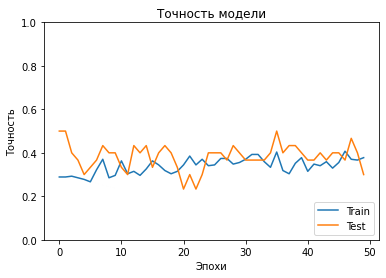

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylim(top=1.0)
plt.ylim(bottom=0.0) 
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Выводы

Полученная точность в 30% процентов говорит о том, что модель не обучилась совсем. То есть применение MLP к сложному набору данных (без использования операций сверток) не позволило получить качественный классификатор

## Задание

Используя представленный Python Notebook обеспечить повышение качество модели за счет следующих стратегий:

* применение стратегий dropout различной агрессивности
* применение различных алгоритмов инициализации весов MLP
* применение различных стратегий регуляризации
* разработка более эффективных архитектур нейронных сетей (добавляйте и удаляйте слои, не не разрешается использовать сверточные слои)
* использование различных функций активации